# Lab 2
### Joshua Min
### minje@usc.edu
### ID: 7926218082

# Part a)

In [111]:
from IPython.display import display, HTML, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

cols = [
    "frequency",
    "attack",
    "chord",
    "velocity",
    "suction",
    "pressure"
]

with open('./airfoil_self_noise.dat') as f:
    data = pd.DataFrame((l.rstrip().split() for l in f), columns=cols)

In [65]:
df = data.copy().dropna().astype(float)

# Part b)

In [66]:
# Separating data into two dataframes:
# X = feature columns
# y = result column
X = df.copy().drop(columns=['pressure'])
y = df.copy().drop(columns=[col for col in cols if col is not 'pressure'])

In [67]:
print("Number of Rows:", len(df))
print("Number of Columns", len(cols))

Number of Rows: 1503
Number of Columns 6


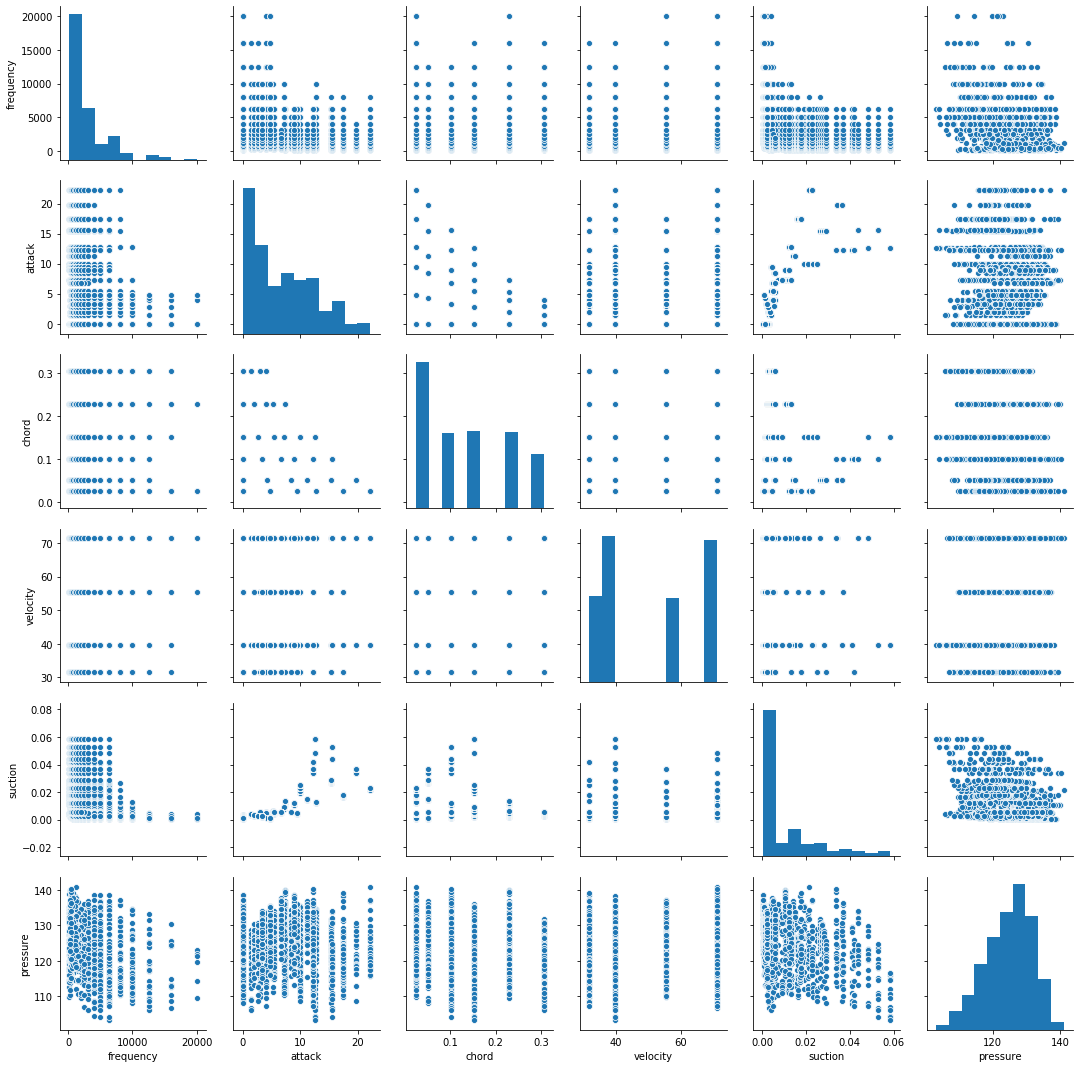

In [68]:
# Pairplots of the data set
sns.pairplot(df)

In [102]:
# Mean, median, range, first and third quartiles of
# each feature of the data set
for col in cols:
    display(df[col].describe())
    print()

count     1503.000000
mean      2886.380572
std       3152.573137
min        200.000000
25%        800.000000
50%       1600.000000
75%       4000.000000
max      20000.000000
Name: frequency, dtype: float64

count    1503.000000
mean        6.782302
std         5.918128
min         0.000000
25%         2.000000
50%         5.400000
75%         9.900000
max        22.200000
Name: attack, dtype: float64

count    1503.000000
mean        0.136548
std         0.093541
min         0.025400
25%         0.050800
50%         0.101600
75%         0.228600
max         0.304800
Name: chord, dtype: float64

count    1503.000000
mean       50.860745
std        15.572784
min        31.700000
25%        39.600000
50%        39.600000
75%        71.300000
max        71.300000
Name: velocity, dtype: float64

count    1503.000000
mean        0.011140
std         0.013150
min         0.000401
25%         0.002535
50%         0.004957
75%         0.015576
max         0.058411
Name: suction, dtype: float64

count    1503.000000
mean      124.835943
std         6.898657
min       103.380000
25%       120.191000
50%       125.721000
75%       129.995500
max       140.987000
Name: pressure, dtype: float64

# Part c)

**frequency**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     270.4
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           5.36e-56
Time:                        16:33:06   Log-Likelihood:                -4910.5
No. Observations:                1503   AIC:                             9825.
Df Residuals:                    1501   BIC:                             9836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.3037      0.222    572.944      0.000     126.868     127.740
frequency     -0.0009    5.2e-05    -16.444      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.973   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                5.002
Skew:                          -0.126   Prob(JB):                       0.0820
Kurtosis:                       2.873   Cond. No.                     5.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**attack**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     37.49
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.17e-09
Time:                        16:33:06   Log-Likelihood:                -5016.4
No. Observations:                1503   AIC:                         1.004e+04
Df Residuals:                    1501   BIC:                         1.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.0701      0.267    471.342      0.000     125.545     126.595
attack        -0.1820      0.030     -6.123      0.000      -0.240      -0.124
==============================================================================
Omnibus:                       39.356   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.719
Skew:                          -0.372   Prob(JB):                     2.37e-09
Kurtosis:                       2.716   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**chord**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     88.66
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.70e-20
Time:                        16:33:06   Log-Likelihood:                -4991.8
No. Observations:                1503   AIC:                             9988.
Df Residuals:                    1501   BIC:                             9998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.2142      0.306    415.558      0.000     126.614     127.815
chord        -17.4170      1.850     -9.416      0.000     -21.045     -13.789
==============================================================================
Omnibus:                       56.985   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.283
Skew:                          -0.470   Prob(JB):                     8.12e-14
Kurtosis:                       2.720   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**velocity**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.87
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.14e-06
Time:                        16:33:06   Log-Likelihood:                -5023.1
No. Observations:                1503   AIC:                         1.005e+04
Df Residuals:                    1501   BIC:                         1.006e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.0172      0.603    202.213      0.000     120.834     123.201
velocity       0.0554      0.011      4.885      0.000       0.033       0.078
==============================================================================
Omnibus:                       52.706   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.503
Skew:                          -0.432   Prob(JB):                     2.41e-12
Kurtosis:                       2.671   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**suction**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     162.6
Date:                Tue, 24 Sep 2019   Prob (F-statistic):           1.92e-35
Time:                        16:33:07   Log-Likelihood:                -4957.6
No. Observations:                1503   AIC:                             9919.
Df Residuals:                    1501   BIC:                             9930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.6632      0.222    571.527      0.000     126.228     127.098
suction     -164.0275     12.862    -12.753      0.000    -189.256    -138.798
==============================================================================
Omnibus:                       26.870   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.468
Skew:                          -0.280   Prob(JB):                     2.95e-06
Kurtosis:                       2.694   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

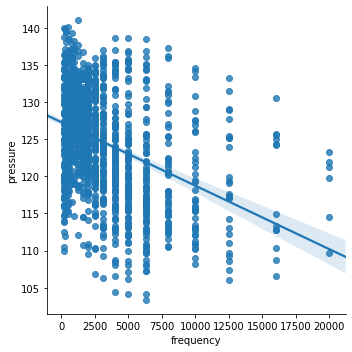

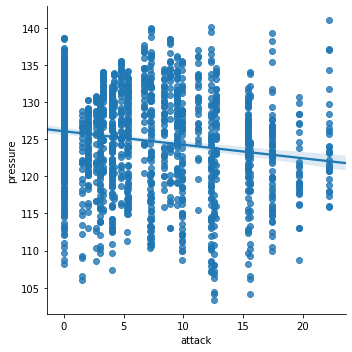

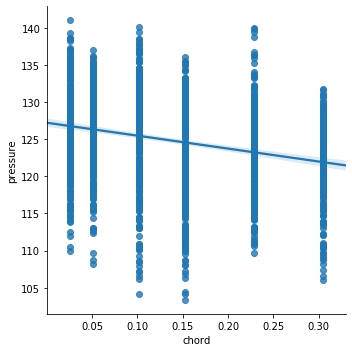

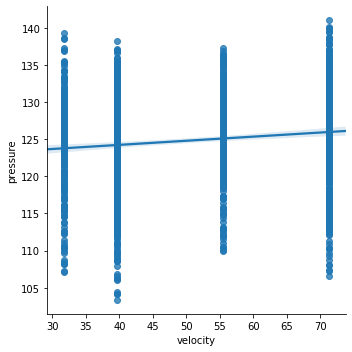

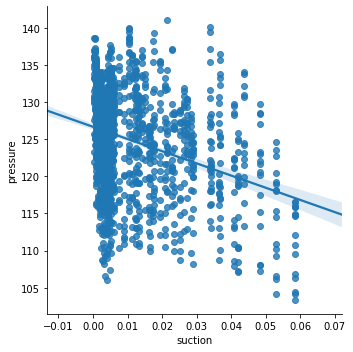

In [96]:
# Fitting a regression model to EACH feature in the
# features column, and saving the coefficient of each
# feature to a dictionary for analysis in part e)
univariate = {}
for col in cols:
    if col is not 'pressure':
        formula = 'pressure ~ ' + col
        # Make a regression plot for each feature
        sns.lmplot(x=col, y='pressure', data=df)
        featureX = df[[col]].copy()
        results = smf.ols(formula=formula, data=df).fit()
        display(Markdown('**' + col + '**'))
        display(results.summary())
        print()
        univariate[col] = results.params[0]

**All** predictors (features) have a p-value < 0.05, so we can therefore say that all of these features have statistical significance.

# Part d)

In [85]:
# Fitting a linear regression model to ALL of the
# features (X), and saving their coefficients to
# a dictionary for plotting in part e)
formula = 'pressure ~ ' + ' + '.join([col for col in cols if col is not 'pressure'])
results_mult = smf.ols(formula=formula, data=df).fit()
display(results_mult.summary())

multivariate = {}
for i in range(len(cols) - 1):
    multivariate[cols[i]] = results_mult.params[i]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     318.8
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          1.15e-232
Time:                        16:25:18   Log-Likelihood:                -4490.1
No. Observations:                1503   AIC:                             8992.
Df Residuals:                    1497   BIC:                             9024.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.8338      0.545    243.866      0.000     131.765     133.902
frequency     -0.0013   4.21e-05    -30.452      0.000      -0.001      -0.001
attack        -0.4219      0.039    -10.847      0.000      -0.498      -0.346
chord        -35.6880      1.630    -21.889      0.000     -38.886     -32.490
velocity       0.0999      0.008     12.279      0.000       0.084       0.116
suction     -147.3005     15.015     -9.810      0.000    -176.753    -117.848
==============================================================================
Omnibus:                       12.947   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.228
Skew:                          -0.020   Prob(JB):                     6.68e-05
Kurtosis:                       3.553   Cond. No.                     5.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**We cannot ignore the null hypothesis for any predictor, as all predictors have an extremely low p-value (less than 0.05)**

# Part e)

[Text(0, 0.5, 'multivariate'), Text(0.5, 0, 'univariate')]

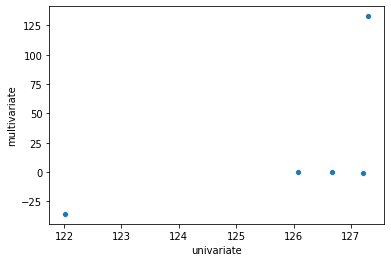

In [86]:
# Plotting univariate against multivariate coefficients
ax = sns.scatterplot(
    x=list(univariate.values()), 
    y=list(multivariate.values())
)
ax.set(xlabel='univariate', ylabel='multivariate')

# Part f)

In [76]:
# Creating a new *feature*^2 column for each feature
# and creating a regression model from these two columns
# (feature, feature^2)
for col in cols:
    if col is not 'pressure':
        new = df[[col]].copy()
        new[col + '^2'] = new[col] ** 2
        results = sm.OLS(y, new).fit()
        res = pd.DataFrame(np.array([
            [
                results.params[0],
                results.pvalues[0],
                results.params[1],
                results.pvalues[1]
            ]
        ]), columns=[
            col + " coefficient",
            col + " p-value",
            col + "^2 coefficient",
            col + "^2 p-value"
        ])
        display(res)

,frequency coefficient,frequency p-value,frequency^2 coefficient,frequency^2 p-value
0,127.303738,0.0,-0.000855,5.361777e-56


,attack coefficient,attack p-value,attack^2 coefficient,attack^2 p-value
0,126.07013,0.0,-0.181972,1.169548e-09


,chord coefficient,chord p-value,chord^2 coefficient,chord^2 p-value
0,127.214201,0.0,-17.416982,1.701420e-20


,velocity coefficient,velocity p-value,velocity^2 coefficient,velocity^2 p-value
0,122.017248,0.0,0.05542,0.000001


,suction coefficient,suction p-value,suction^2 coefficient,suction^2 p-value
0,126.663189,0.0,-164.027463,1.924783e-35


# Part g)

In [105]:
interactions = X.copy()
poly = PolynomialFeatures(2)

interactions_cols = poly.fit_transform(interactions)
interactions_head = poly.get_feature_names(interactions.columns)
interactions = pd.DataFrame(interactions_cols, columns=interactions_head)

# Display summary of results for the linear regression model
# with interaction terms
results_interactions = sm.OLS(y, interactions).fit()
display(results_interactions.summary())
print()

# Using an alpha value of 0.05 as the threshold for
# determining significance of p-values, and saving
# significant p-values for an improved model in part h)
significant_cols = []
for i, p in enumerate(results_interactions.pvalues):
    if float(p) < 0.05:
        significant_cols.append(interactions_head[int(i)])
        display(Markdown('**' + interactions_head[int(i)] + '**' + " is statistically significant because its p-value is less than 0.05"))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     134.6
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          2.21e-315
Time:                        16:48:43   Log-Likelihood:                -4256.8
No. Observations:                1503   AIC:                             8556.
Df Residuals:                    1482   BIC:                             8667.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
1                    134.5659      2.113     63.674      0.000     130.420     138.711
frequency             -0.0006      0.000     -3.362      0.001      -0.001      -0.000
attack                -0.8241      0.180     -4.581      0.000      -1.177      -0.471
chord                -58.9699      8.529     -6.914      0.000     -75.701     -42.239
velocity               0.0018      0.077      0.024      0.981      -0.149       0.152
suction              301.6670    117.355      2.571      0.010      71.467     531.867
frequency^2         9.166e-09   7.81e-09      1.174      0.241   -6.15e-09    2.45e-08
frequency attack   -3.495e-06   1.38e-05     -0.254      0.800   -3.05e-05    2.35e-05
frequency chord       -0.0048      0.000    -11.310      0.000      -0.006      -0.004
frequency velocity  2.988e-06   2.69e-06      1.112      0.266   -2.28e-06    8.26e-06
frequency suction     -0.0615      0.007     -9.395      0.000      -0.074      -0.049
attack^2               0.0235      0.010      2.368      0.018       0.004       0.043
attack chord           3.9362      0.930      4.233      0.000       2.112       5.760
attack velocity       -0.0024      0.002     -1.019      0.308      -0.007       0.002
attack suction       -22.3707      9.912     -2.257      0.024     -41.813      -2.928
chord^2               92.4763     19.402      4.766      0.000      54.419     130.534
chord velocity         0.1433      0.096      1.492      0.136      -0.045       0.332
chord suction      -2006.7764    621.149     -3.231      0.001   -3225.202    -788.351
velocity^2             0.0005      0.001      0.630      0.529      -0.001       0.002
velocity suction       3.1609      0.969      3.262      0.001       1.260       5.062
suction^2            134.5409   1639.094      0.082      0.935   -3080.650    3349.732
==============================================================================
Omnibus:                       44.749   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.499
Skew:                          -0.227   Prob(JB):                     5.46e-18
Kurtosis:                       4.031   Cond. No.                     7.55e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**1** is statistically significant because its p-value is less than 0.05

**frequency** is statistically significant because its p-value is less than 0.05

**attack** is statistically significant because its p-value is less than 0.05

**chord** is statistically significant because its p-value is less than 0.05

**suction** is statistically significant because its p-value is less than 0.05

**frequency chord** is statistically significant because its p-value is less than 0.05

**frequency suction** is statistically significant because its p-value is less than 0.05

**attack^2** is statistically significant because its p-value is less than 0.05

**attack chord** is statistically significant because its p-value is less than 0.05

**attack suction** is statistically significant because its p-value is less than 0.05

**chord^2** is statistically significant because its p-value is less than 0.05

**chord suction** is statistically significant because its p-value is less than 0.05

**velocity suction** is statistically significant because its p-value is less than 0.05

# Part h)

In [103]:
# Creating a new dataset from the subset of features that
# we found were statistically significant from the previous
# model.
significant = interactions.copy()
significant.drop(
    columns=[col for col in interactions_head if col not in significant_cols],
    inplace=True
)

# Use only 70% of the dataset for training each model
significant_train = significant[:int(len(df) * 0.7)]
interactions_train = interactions[:int(len(df) * 0.7)]
y_train = y[:int(len(df) * 0.7)]

# Fit the models using the training data
results_significant = sm.OLS(y_train, significant_train).fit()
results_interactions = sm.OLS(y_train, interactions_train).fit()

# Use the remaining data to test the models
significant_test = significant[int(len(df) * 0.7):]
interactions_test = interactions[int(len(df) * 0.7):]
y_test = y[int(len(df) * 0.7):]

# Calculate training errors
significant_pred = results_significant.predict(significant_train)
interactions_pred = results_interactions.predict(interactions_train)

significant_train_error = mean_squared_error(
    y_train["pressure"],
    significant_pred
)

interactions_train_error = mean_squared_error(
    y_train["pressure"],
    interactions_pred
)

# Calculate test errors
significant_pred = results_significant.predict(significant_test)
interactions_pred = results_interactions.predict(interactions_test)

significant_test_error = mean_squared_error(
    y_test["pressure"],
    significant_pred
)

interactions_test_error = mean_squared_error(
    y_test["pressure"],
    interactions_pred
)

# Display training and test errors
display(Markdown("## Errors"))
errors_significant = pd.DataFrame([[
    significant_train_error,
    significant_test_error
]], columns=["train", "test"])
errors_significant.index.name = "Only Significant Interactions and Polynomial"
display(errors_significant)

errors_interactions = pd.DataFrame([[
    interactions_train_error,
    interactions_test_error
]], columns=["train", "test"])
errors_interactions.index.name = "All Interactions and Polynomial"
display(errors_interactions)

## Errors

,train,test
Only Significant Interactions and Polynomial,,
0,14.164438,29.166832


,train,test
All Interactions and Polynomial,,
0,12.314033,38.748357


# Part i)

Best fit for normalized is when **k=2**

Best fit for raw is when **k=13**

The lowest test error achieved using KNN is **0.005435898763627599**

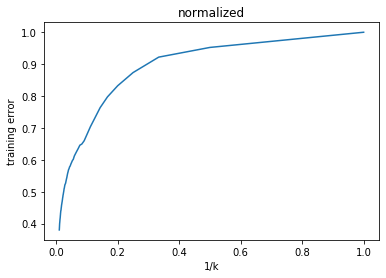

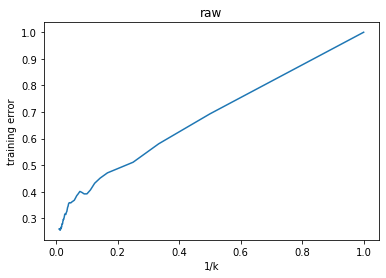

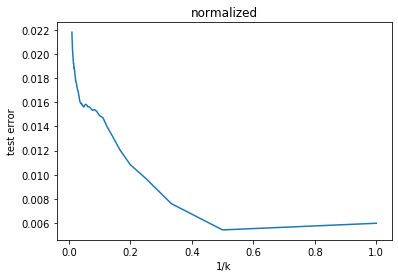

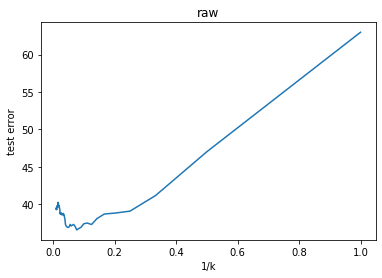

<Figure size 432x288 with 0 Axes>

In [141]:
# Normalize X and y
scaler = preprocessing.MinMaxScaler()
norm_X = pd.DataFrame(scaler.fit_transform(X))
norm_y = pd.DataFrame(scaler.fit_transform(y))

# Arrays to store train/test errors for the KNN
# classifiers on normalized and raw data
norm_perf = []
raw_perf = []

# Split data into train and test sets
# 70% train
# 30% test
norm_X_train, norm_X_test, norm_y_train, norm_y_test = train_test_split(
    norm_X,
    norm_y,
    test_size=0.3,
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Define optimal k as the k which yields the lowest test error
def best_k(x):
    return x["test_err"]

# Define and test models on both datasets for 1 <= k <= 100
for k in range(1, 101, 1):
    # Fit and test normalized data for each k
    clf_norm = neighbors.KNeighborsRegressor(
        n_neighbors=k
    )
    clf_norm.fit(norm_X_train, norm_y_train)
    results_norm = clf_norm.predict(norm_X_test)
    err_test_norm = metrics.mean_squared_error(
        norm_y_test,
        results_norm
    )
    norm_perf.append({
        "test_err": err_test_norm,
        "train_err": clf_norm.score(norm_X_train, norm_y_train),
        "k": k
    })
    
    # Fit and test raw data for each k
    clf_raw = neighbors.KNeighborsRegressor(
        n_neighbors=k
    )
    clf_raw.fit(X_train, y_train)
    results_raw = clf_raw.predict(X_test)
    err_test_raw = metrics.mean_squared_error(
        y_test,
        results_raw
    )
    raw_perf.append({
        "test_err": err_test_raw,
        "train_err": clf_raw.score(X_train, y_train),
        "k": k
    })
    

# Plot train and test errors for both data sets
ax = sns.lineplot(
    x=[1/p["k"] for p in norm_perf],
    y=[p["train_err"] for p in norm_perf],
)
ax.set(xlabel="1/k", ylabel="training error", title="normalized")
plt.figure()

ax = sns.lineplot(
    x=[1/p["k"] for p in raw_perf],
    y=[p["train_err"] for p in raw_perf],
)
ax.set(xlabel="1/k", ylabel="training error", title="raw")
plt.figure()

ax = sns.lineplot(
    x=[1/p["k"] for p in norm_perf],
    y=[p["test_err"] for p in norm_perf],
)
ax.set(xlabel="1/k", ylabel="test error", title="normalized")
plt.figure()

ax = sns.lineplot(
    x=[1/p["k"] for p in raw_perf],
    y=[p["test_err"] for p in raw_perf],
)
ax.set(xlabel="1/k", ylabel="test error", title="raw")
plt.figure()


# Find optimum k for both data sets
opt_k_norm = min(norm_perf, key=best_k)
opt_k_raw = min(raw_perf, key=best_k)

# Display our findings for optimum k and smallest test error
display(Markdown(f'Best fit for normalized is when **k={opt_k_norm["k"]}**'))
display(Markdown(f'Best fit for raw is when **k={opt_k_raw["k"]}**'))
display(Markdown(
    f'The lowest test error achieved using KNN is **{min(opt_k_raw["test_err"], opt_k_norm["test_err"])}**'
))

# Part j)

KNN regression seemed to vastly outperform even the optimized linear regression model used in this dataset.

The test error of our optimized linear regression model was at ~29%, while the test error of the KNN model with an optimal k hovers at ~0.5%.

This discrepency could have arose from noise in our dataset that could have skewed our model which had several covariant features in it.